In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU


random.seed(42)

In [2]:
df_all = pd.read_csv('~/work/project/clean_df.csv')
df_all['time_close'] = pd.to_datetime(df_all['time_close'])
df = df_all.loc[df_all['symbol_id'] == 'LTC_2'].copy().reset_index(drop=True)
symbols = ['DOGE_74', 'ETH_1027', 'XRP_52', 'XLM_512', 'BTC_1', 'XMR_328']
for sym in symbols:
    df[(sym + ' change')] = df_all.loc[df_all['symbol_id'] ==  sym]['price change'].values
# df.drop(columns=['symbol_id', 'tomorrow change', 'month', 'day', 'weekday', 'day of week', 'Oil'], inplace=True)
# df['target'] = df['close'].shift()
df.head()

,symbol_id,time_close,close,volume,marketcap,month,day,weekday,day of week,price change,...,10Y Treasury,Gold,Oil,EUR_USD,DOGE_74 change,ETH_1027 change,XRP_52 change,XLM_512 change,BTC_1 change,XMR_328 change
0,LTC_2,2020-09-24,43.575650,1.723047e+09,2.855191e+09,9,24,3,1,-0.021570,...,0.666,1868.300049,40.310001,1.165854,-0.025248,-0.059389,-0.045198,-0.041776,-0.021312,-0.051886
1,LTC_2,2020-09-25,44.790372,2.027335e+09,2.935124e+09,9,25,4,1,0.027876,...,0.659,1857.699951,40.250000,1.167324,0.021075,0.078154,0.040102,0.023188,0.046477,0.037234
2,LTC_2,2020-09-26,46.090238,1.852828e+09,3.020641e+09,9,26,5,0,0.029021,...,0.659,1857.699951,40.250000,1.167324,0.027243,0.010122,0.049036,0.066801,-0.009782,0.014505
3,LTC_2,2020-09-27,46.340146,2.191838e+09,3.037367e+09,9,27,6,0,0.005422,...,0.659,1857.699951,40.250000,1.167324,0.007860,0.021704,-0.000456,-0.010805,0.009511,0.021696
4,LTC_2,2020-09-28,46.434781,2.217909e+09,3.043916e+09,9,28,0,1,0.002042,...,0.663,1872.800049,40.599998,1.163535,0.005012,-0.002503,0.005170,-0.000851,0.010435,0.028372


In [3]:
# df['SMA_5'] = df['close'].rolling(5).mean().shift()

In [4]:
# def relative_strength_idx(df, n=14):
#     close = df['close']
#     delta = close.diff()
#     delta = delta[1:]
#     pricesUp = delta.copy()
#     pricesDown = delta.copy()
#     pricesUp[pricesUp < 0] = 0
#     pricesDown[pricesDown > 0] = 0
#     rollUp = pricesUp.rolling(n).mean()
#     rollDown = pricesDown.abs().rolling(n).mean()
#     rs = rollUp / rollDown
#     rsi = 100.0 - (100.0 / (1.0 + rs))
#     return rsi
# df['RSI'] = relative_strength_idx(df).fillna(0)

In [5]:
# EMA_12 = pd.Series(df['close'].ewm(span=12, min_periods=12).mean())
# EMA_26 = pd.Series(df['close'].ewm(span=26, min_periods=26).mean())
# df['MACD'] = pd.Series(EMA_12 - EMA_26)

In [6]:
# df.dropna(inplace=True)
# df.reset_index(inplace=True, drop=True)
# df.head()

In [7]:
data_set = df[['close', 'time_close']]

In [8]:
train = data_set.loc[data_set['time_close'] < '2022-01-03'].copy()
test = data_set.loc[data_set['time_close'] >= '2022-01-03'].copy()

In [9]:
train_dates = train['time_close'].values
test_dates = test['time_close'].values

In [10]:
train.drop(columns='time_close', inplace = True)
test.drop(columns='time_close', inplace = True)

In [11]:
sc = MinMaxScaler(feature_range=(0,1))
train = sc.fit_transform(train)
test = sc.transform(test)

In [12]:
def make_set(data, n):
    x_train = []
    y_train = []
    for i in range(n,len(data)):
        x_train.append(data[i-n:i,0])
        y_train.append(data[i,0])
    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
    return x_train, y_train
n = 60
x_train, y_train = make_set(train, n)
x_test, y_test = make_set(test, n)

In [13]:
regressor = Sequential()
regressor.add(LSTM(units=128, return_sequences=True, input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=64, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=32, return_sequences=False))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))

[ERROR] 2022-11-09T06:05:38.305504Z, 113484, 113484, "Error performing handshake with server 10.183.0.174:55001"
[ERROR] 2022-11-09T06:05:38.305529Z, 113484, 113484, "Unable to connect to server. Initial handshake failed."
[ERROR] 2022-11-09T06:05:38.305541Z, 113484, 113484, "Error establishing connection in generated_cuInitialize: Connection refused"
[ERROR] 2022-11-09T06:05:38.305551Z, 113484, 113484, "Communication error(s), check network connectivity"
2022-11-09 06:05:38.305631: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: UNKNOWN ERROR (101)
2022-11-09 06:05:38.305706: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ft-40023-40): /proc/driver/nvidia/version does not exist
2022-11-09 06:05:38.306216: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in perfor

In [14]:
# regressor = Sequential()
# regressor.add(GRU(units=128, return_sequences=True, input_shape=(x_train.shape[1],1), activation='relu'))
# regressor.add(Dropout(0.2))
# regressor.add(GRU(units=64, return_sequences=True, input_shape=(x_train.shape[1],1), activation='relu'))
# regressor.add(Dropout(0.2))
# regressor.add(GRU(units=32, return_sequences=False, input_shape=(x_train.shape[1],1), activation='relu'))
# regressor.add(Dropout(0.2))
# regressor.add(Dense(units=1))

In [15]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
regressor.compile(optimizer='adam', loss='mean_squared_error')
regressor.fit(x_train,y_train, epochs=25, batch_size=16, callbacks=[callback])

2022-11-09 06:05:39.991685: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25
26/26 [==============================] - 14s 315ms/step - loss: 0.0313
Epoch 2/25
26/26 [==============================] - 11s 440ms/step - loss: 0.0124
Epoch 3/25
26/26 [==============================] - 9s 367ms/step - loss: 0.0098
Epoch 4/25
26/26 [==============================] - 9s 341ms/step - loss: 0.0107
Epoch 5/25
26/26 [==============================] - 8s 311ms/step - loss: 0.0097
Epoch 6/25
26/26 [==============================] - 9s 358ms/step - loss: 0.0089
Epoch 7/25
26/26 [==============================] - 8s 326ms/step - loss: 0.0078
Epoch 8/25
26/26 [==============================] - 9s 340ms/step - loss: 0.0082
Epoch 9/25
26/26 [==============================] - 10s 392ms/step - loss: 0.0075
Epoch 10/25
26/26 [==============================] - 8s 321ms/step - loss: 0.0071
Epoch 11/25
26/26 [==============================] - 7s 257ms/step - loss: 0.0057
Epoch 12/25
26/26 [==============================] - 7s 265ms/step - loss: 0.0056
Epoch 13/25
26/26 [===

In [16]:
pred = regressor.predict(x_test)
pred = sc.inverse_transform(pred)

In [17]:
mean_squared_error(y_test, pred)

6756.757417813751

In [18]:
true_y_train = sc.inverse_transform(y_train.reshape(-1,1))
true_y_test = sc.inverse_transform(y_test.reshape(-1,1))

In [19]:
train_pred = regressor.predict(x_train)
train_pred = sc.inverse_transform(train_pred)
mean_squared_error(y_train, train_pred)

32673.058819009213

Text(0.5, 1.0, 'Training predicted price vs actual')

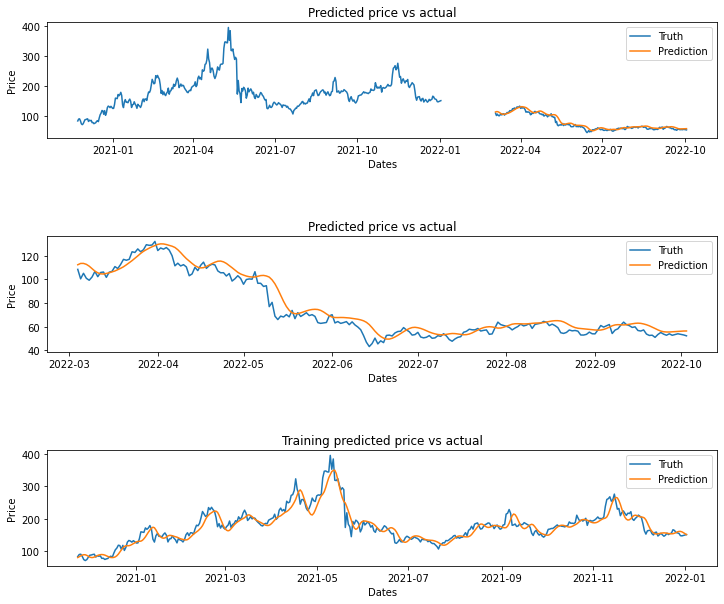

In [20]:
fig, ax = plt.subplots(nrows=3, ncols=1,figsize = (12, 10))
plt.subplots_adjust(hspace = 0.85)
ax[0].plot(train_dates[n:], true_y_train, 'C0', label='Truth')
ax[0].plot(test_dates[n:], true_y_test, 'C0')
ax[0].plot(test_dates[n:], pred, 'C1', label='Prediction')
ax[0].legend()
ax[0].set_xlabel('Dates')
ax[0].set_ylabel('Price')
ax[0].set_title('Predicted price vs actual')

ax[1].plot(test_dates[n:], true_y_test, 'C0', label='Truth')
ax[1].plot(test_dates[n:], pred, 'C1', label='Prediction')
ax[1].legend()
ax[1].set_xlabel('Dates')
ax[1].set_ylabel('Price')
ax[1].set_title('Predicted price vs actual')

ax[2].plot(train_dates[n:], true_y_train, 'C0', label='Truth')
ax[2].plot(train_dates[n:], train_pred, 'C1', label='Prediction')
ax[2].legend()
ax[2].set_xlabel('Dates')
ax[2].set_ylabel('Price')
ax[2].set_title('Training predicted price vs actual')